In [5]:
import pandas as pd 
from webbrowser import BackgroundBrowser
import dash
import dash_html_components as html
import plotly.graph_objects as go
import dash_core_components as dcc
from dash.dependencies import Input, Output
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import plotly.express as px
import seaborn as sns
import plotly 
from jupyter_dash import JupyterDash

In [2]:
df=pd.read_excel("BookingDataCleanedver2.xlsx")

In [3]:
df

,Unnamed: 0,URLS,Title,Price,Check_in,Check_Out,Rate,Address,latlon,Score,...,Checkout_day,Year,Month,Day,Check_Month,lon,lat,Airportlon,Airportlat,Distance
0,0,https://www.booking.com/hotel/sa/golden-dune.a...,جولدن ديون هوتل & سويت,360.00,2022-09-03,2022-09-04,3,"شارع سعود العثمان سعود سعود العثمان سعود, 142...","24.68825273,46.80286766",8.1,...,Sunday,2022,9,4,September,24.6883,46.8029,24.9637,46.7008,32.310127
1,1,https://www.booking.com/hotel/sa/fndq-lbyrl-la...,فندق لابيرلا,281.25,2022-09-03,2022-09-04,3,"فندق لابيرلا, 13216 الرياض, المملكة العربية ال...","24.79451790,46.81846073",7.3,...,Sunday,2022,9,4,September,24.7945,46.8185,24.9637,46.7008,22.247344
2,2,https://www.booking.com/hotel/sa/krm-lryd-kare...,فندق كارم الرياض Karim Hotel Riyadh,348.75,2022-09-03,2022-09-04,4,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...","24.75476486,46.70609703",8.6,...,Sunday,2022,9,4,September,24.7548,46.7061,24.9637,46.7008,23.234800
3,3,https://www.booking.com/hotel/sa/myn-lmlq-107....,Almakan Hotel 113,172.50,2022-09-03,2022-09-04,3,"King Fahd Road العمرة -الملقا, 13521 الرياض, ا...","24.66230438,46.70117478",6.6,...,Sunday,2022,9,4,September,24.6623,46.7012,24.9637,46.7008,33.514213
4,4,https://www.booking.com/hotel/sa/tulip-inn-al-...,فندق ريف الملز إنترناشونال,135.00,2022-09-03,2022-09-04,3,"طريق الملك عبد العزيزخلف بنك سامبا , الملاذ, 9...","24.65901078,46.72079802",5.5,...,Sunday,2022,9,4,September,24.6590,46.7208,24.9637,46.7008,33.941213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105663,105663,https://www.booking.com/hotel/sa/kease-a6-al-m...,Kease A6 Al-Malqa Modern Royal Era,1121.25,2023-09-01,2023-09-02,4,"7856 ابحر, 13524 الرياض, المملكة العربية السعودية","24.81915457,46.60549237",10.0,...,Saturday,2023,9,2,September,24.8192,46.6055,24.9637,46.7008,18.723535
105664,105664,https://www.booking.com/hotel/sa/al-tawan-b5-4...,Kease B5-4 AlTawun Royal Touch - التعاون اللمس...,1233.75,2023-09-01,2023-09-02,3,"3858 العباس بن عبدالمطلب, 12476 الرياض, المملك...","24.77499250,46.70473590",6.7,...,Saturday,2023,9,2,September,24.7750,46.7047,24.9637,46.7008,20.986195
105665,105665,https://www.booking.com/hotel/sa/a5-1-altawun-...,Kease A5-1 Al Tawun Royal Touch - التعاون اللم...,1233.75,2023-09-01,2023-09-02,4,"3858 العباس بن عبدالمطلب, 12476 الرياض, المملك...","24.77499250,46.70473590",4.5,...,Saturday,2023,9,2,September,24.7750,46.7047,24.9637,46.7008,20.986195
105666,105666,https://www.booking.com/hotel/sa/l-mt-b-swyts-...,ال متعب سويتس الفلاح,240.00,2023-09-01,2023-09-02,3,"طريق عثمان بن عفان, 13314 الرياض, المملكة العر...","24.78986673,46.70271270",7.7,...,Saturday,2023,9,2,September,24.7899,46.7027,24.9637,46.7008,19.326650


In [4]:
df.reset_index(inplace=True)

In [6]:
df.Check_Month.unique()

array(['September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August'],
      dtype=object)

In [7]:
Hotel=df[(df['Score'] != 0)&(df['Check_Month'] =="September")]

In [8]:
HotelPrice = df.drop_duplicates(
  subset = ['Title'],
  keep = 'first').reset_index(drop = True)

In [9]:
HotelHieghstPrice=HotelPrice.sort_values(by=['Price'],ascending=False)

In [10]:
Type=Hotel['TYPE'].value_counts()

In [11]:
# Type.values
Type.index

Index(['Room', 'Apartment', 'Studio', 'Suite', 'House', 'Chalet'], dtype='object')

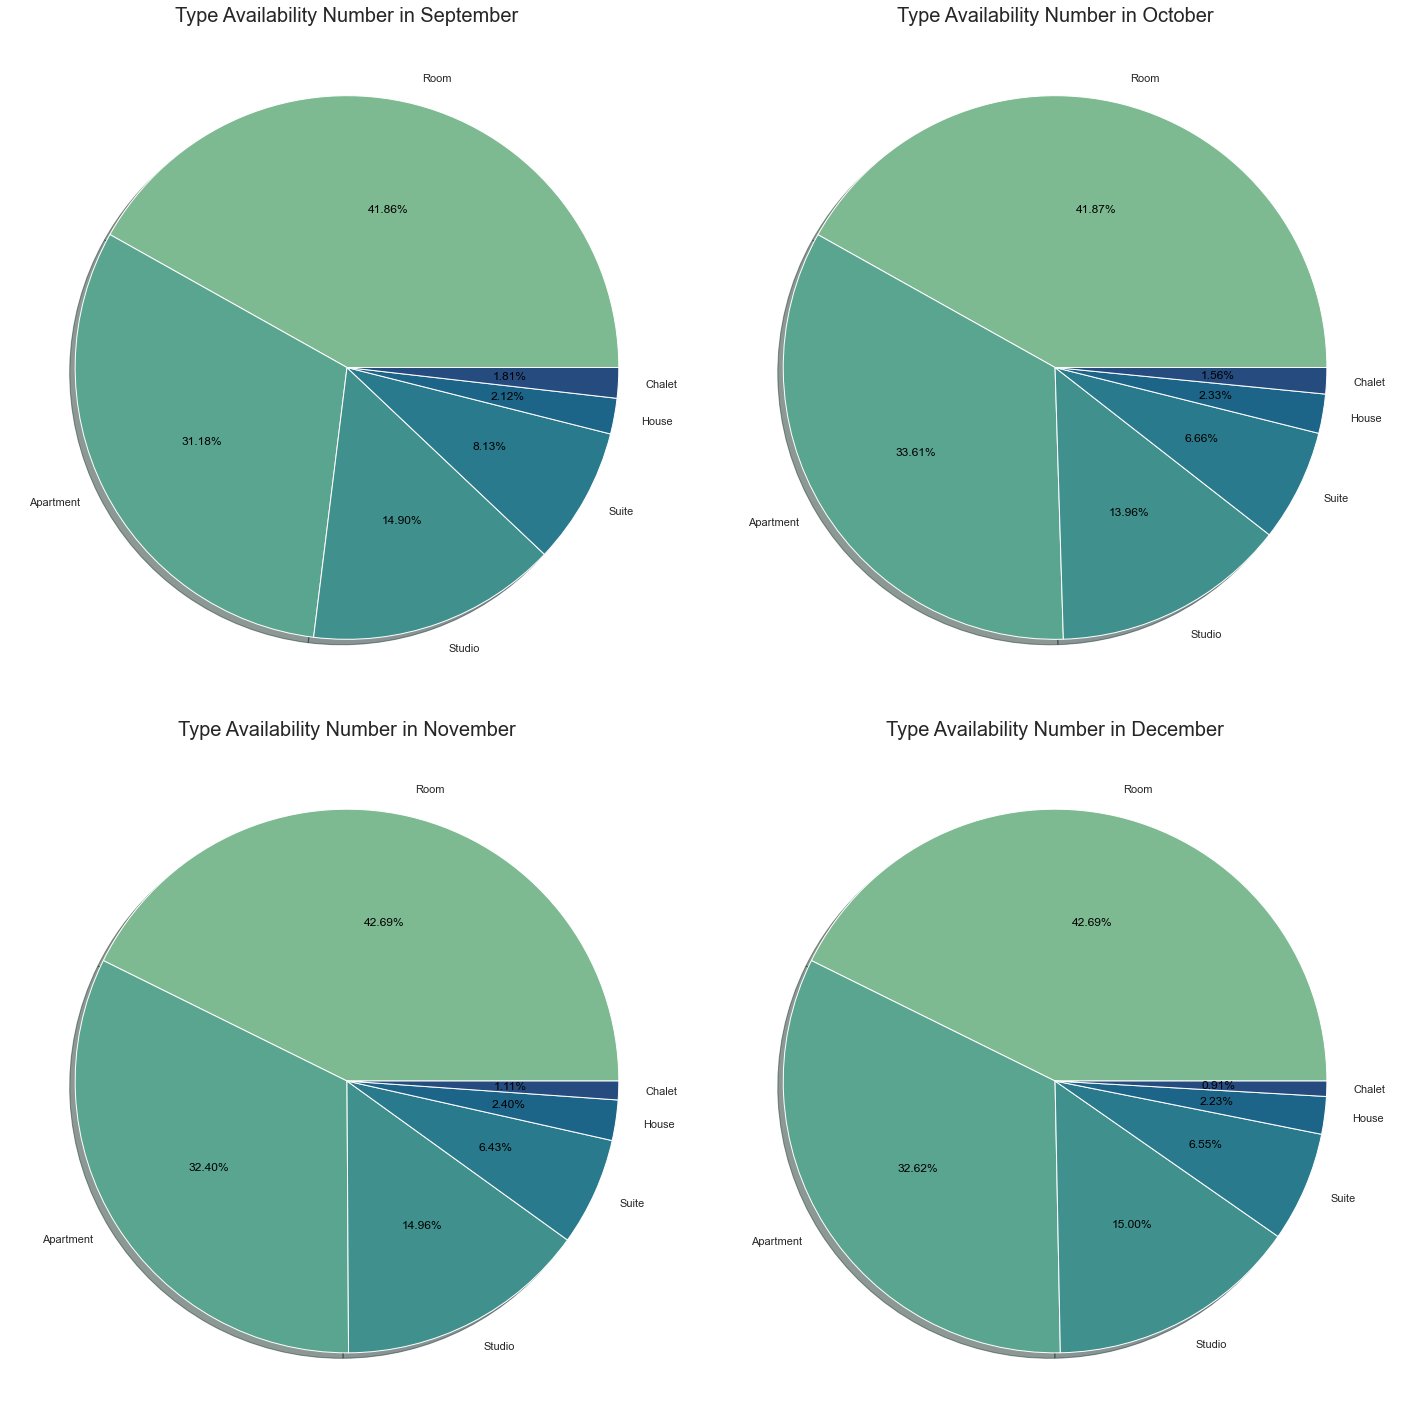

In [13]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title('Type Availability Number in September',fontsize=20)
sns.set_theme(palette="crest")
Hotel=df[(df['Score'] != 0)&(df['Check_Month'] =="September")]
Type=Hotel['TYPE'].value_counts()
_, _, autotexts=plt.pie(Type.values, labels = Type.index,shadow = True, autopct = '%.2f%%')
for ins in autotexts:
    ins.set_color('#000000')
plt.subplot(2, 2, 2)
sns.set_theme(palette="crest")
plt.title('Type Availability Number in October',fontsize=20)
Hotel=df[(df['Score'] != 0)&(df['Check_Month'] =="October")]
Type=Hotel['TYPE'].value_counts()
_, _, autotexts=plt.pie(Type.values, labels = Type.index, shadow = True, autopct = '%.2f%%')
for ins in autotexts:
    ins.set_color('#000000')

plt.subplot(2,2,3)
sns.set_theme(palette="crest")
plt.title('Type Availability Number in November',fontsize=20)
Hotel=df[(df['Score'] != 0)&(df['Check_Month'] =="November")]
Type=Hotel['TYPE'].value_counts()
_, _, autotexts=plt.pie(Type.values, labels = Type.index,shadow = True, autopct = '%.2f%%')
for ins in autotexts:
    ins.set_color('#000000')

plt.subplot(2,2,4)
sns.set_theme(palette="crest")
plt.title('Type Availability Number in December',fontsize=20)
Hotel=df[(df['Score'] != 0)&(df['Check_Month'] =="December")]
Type=Hotel['TYPE'].value_counts()
_, _, autotexts=plt.pie(Type.values, labels = Type.index,shadow = True, autopct = '%.2f%%')
for ins in autotexts:
    ins.set_color('#000000')
plt.tight_layout() # To increase space between plots to prevent label overlap
plt.show()

In [15]:
HotelHieghstPrice=HotelHieghstPrice[['Title','Price','TYPE']]

In [16]:
HotelHieghstPrice=HotelHieghstPrice[(HotelHieghstPrice["TYPE"] == "Room")]

In [17]:
HotelHieghstPrice=HotelHieghstPrice[0:5]

In [18]:
HouseHieghstPrice=HotelPrice.sort_values(by=['Price'],ascending=False)

In [19]:
HouseHieghstPrice=HotelPrice.sort_values(by=['Price'],ascending=False)
HouseHieghstPrice=HouseHieghstPrice[['Title','Price','TYPE']]

In [20]:
HouseHieghstPrice.TYPE.unique()

array(['House', 'Room', 'Chalet', 'Apartment', 'Suite', 'Studio'],
      dtype=object)

In [21]:
HouseHieghstPrice=HouseHieghstPrice[(HouseHieghstPrice['TYPE'] == "House")]

In [22]:
HouseHieghstPrice

,Title,Price,TYPE
379,فلل فيفيندا الفندقية غرناطة,3993.75,House
381,فيلا ماماز بدروم مساحه كبيره وغرفة سينما,2872.50,House
242,The Valley Resort,2643.75,House
394,منتجع سوليس فيلا الرياض,2175.00,House
234,منازل جوراق,1946.25,House
487,Mabaat - Al Olaya - 614,1391.25,House
366,فندق العمري للفل الفندقية,1365.00,House
372,سمو 1,1143.75,House
208,Braira Hettin,798.75,House
310,سمو 4,600.00,House


In [23]:
HotelHieghstPrice=HotelHieghstPrice[0:5]

In [24]:
df.Check_Month.unique()

array(['September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August'],
      dtype=object)

In [25]:
HotelScore.index

NameError: name 'HotelScore' is not defined

In [26]:
df.TYPE.unique()

array(['Room', 'Studio', 'Apartment', 'Suite', 'Chalet', 'House'],
      dtype=object)

In [27]:
# Create object app ---> the dashboard
app = JupyterDash(__name__)
app.layout = html.Div([ # The title for the dashboard 
    html.H1('Booking DashBoard' ,style={'color': '#334b7d', 'fontSize': 40 , 'textAlign': 'center'}),
                       
      # Tabs manger to handle tabs --> each tab is plot with it's options                   
    dcc.Tabs(id="tabs-with-props", value='tab-1',
             children=[
            # Frist plot  
        dcc.Tab(label='The Distribution Score For Each Month', value='tab-3' ,children = [html.Label('Please Choose The Month :' , style={'color': 'Black', 'fontSize': 35}),
             dcc.Dropdown(id = "Colmuns1" ,options = ['September', 'October', 'November', 'December', 'January','February', 'March', 'April', 'May', 'June', 'July', 'August'], value = 'September'), 
            ]),
                # Second plot 
                 dcc.Tab(label='Top 5 HieghstPrice For Each Type', value='tab-2' , children = [html.Label('Please Choose TheType :' , style={'color': 'Black', 'fontSize': 35}),
             dcc.Dropdown(id = "Columns3" ,options = ['Room', 'Studio', 'Apartment', 'Suite', 'Chalet', 'House'], value = 'Room')]),
                # Third plot 
      dcc.Tab(label='Type Availability Number By Each Month', value='tab-4' ,children = [html.Label('Please Choose The Month :' , style={'color': 'Black', 'fontSize': 35}),
             dcc.Dropdown(id = "Colmuns2" ,options = ['September', 'October', 'November', 'December', 'January','February', 'March', 'April', 'May', 'June', 'July', 'August'], value = 'September'),]),], 
        # Theme for the tabs      
        colors={
        "border": "#334b7d",
        "primary": "#334b7d",
        "background": "#334b7d"
    }),
   # Break line 
    html.Br(),
    # Output for the dashboard
    dcc.Graph(id = "chart" , figure = {}),
    
    

])

# Calling the the output & input 
@app.callback([Output(component_id='chart', component_property='figure')],
    [Input(component_id='tabs-with-props', component_property='value'),
    Input(component_id='Columns3', component_property='value'),
    Input(component_id='Colmuns1', component_property='value'),
     Input(component_id='Colmuns2', component_property='value'),

])
# Function for the display the result --> it will be call by @app.callback 
def render_content(tab ,Attrition3,Attrition1 ,Attrition2):
    # Examine the tab going to follow the user selections
    if tab == 'tab-2':
      # Filter the user-selected Attrition type
      Condition_No=HotelHieghstPrice[HotelHieghstPrice['TYPE']== Attrition3]
      Condition_No=Condition_No[0:5]
      fig = px.scatter(Condition_No, x="Title", y="Price", size = 'Price').update_layout(
          xaxis_title="Name", yaxis_title="The Hieghst Price")
      fig.update_layout(title_text= "The Month Income With Total Working Years For", title_x=0.5)
      fig.update_traces(dict(marker_line_width=0))
      return [fig]
    
    # Examine the tab going to follow the user selections
    elif tab == 'tab-3':
      Hotel=df[(df['Score'] != 0)&(df['Check_Month'] ==Attrition1)]
      HotelScore=Hotel['Score'].value_counts()
      fig=px.histogram(HotelScore.index)
      return [fig]
    
    # Examine the tab going to follow the user selections
    elif tab == 'tab-4':
      Hotel=df[(df['Score'] != 0)&(df['Check_Month'] ==Attrition2)]
      Type=Hotel['TYPE'].value_counts()
      fig = px.pie(Type, values=Type.values, names=Type.index, hole=.3)
      return [fig]
      
    # Examine the tab going to follow the user selections
    
         
            
            
# Run the dashboard 
if __name__ == '__main__': 
    app.run_server(mode="inline", debug=False,port= 50571) 

 * Running on http://127.0.0.1:50571/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Sep/2022 00:10:09] "GET /_alive_e30ca0c9-3b9d-45f2-b875-99a0c2c29cb9 HTTP/1.1" 200 -


127.0.0.1 - - [12/Sep/2022 00:10:09] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [12/Sep/2022 00:10:09] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [12/Sep/2022 00:10:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Sep/2022 00:10:10] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [12/Sep/2022 00:10:10] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Sep/2022 00:10:10] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Sep/2022 00:10:10] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [12/Sep/2022 00:10:10] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [12/Sep/2022 00:10:10] "POST /_dash-update-component HTTP/1.1" 500 -


---------------------------------------------------------------------------
SchemaTypeValidationError                 Traceback (most recent call last)
File ~/opt/anaconda3/lib/python3.9/site-packages/flask/app.py:1950, in Flask.full_dispatch_request(self=<Flask '__main__'>)
   1948     rv = self.preprocess_request()
   1949     if rv is None:
-> 1950         rv = self.dispatch_request()
        rv = None
        self = <Flask '__main__'>
   1951 except Exception as e:
   1952     rv = self.handle_user_exception(e)

File ~/opt/anaconda3/lib/python3.9/site-packages/flask/app.py:1936, in Flask.dispatch_request(self=<Flask '__main__'>)
   1934     return self.make_default_options_response()
   1935 # otherwise dispatch to the handler for that endpoint
-> 1936 return self.view_functions[rule.endpoint](**req.view_args)
        req = <Request 'http://127.0.0.1:50571/_dash-update-component' [POST]>
        rule = <Rule '/_dash-update-component' (POST, OPTIONS) -> /_dash-update-component>
    

127.0.0.1 - - [12/Sep/2022 00:10:24] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [12/Sep/2022 00:10:24] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Sep/2022 00:10:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Sep/2022 00:10:26] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Sep/2022 00:10:26] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Sep/2022 00:10:27] "POST /_dash-update-component HTTP/1.1" 200 -
